In [21]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, mean_squared_error
from sklearn.neural_network import MLPClassifier
from tensorflow.keras import layers, models
import tensorflow as tf

In [2]:
# Read the CSV file and set the first row as the header
df_original = pd.read_csv('diabetes.csv', header=0)

# Set the outcome variable
y = df_original.iloc[:,0]

# Create a new DataFrame with selected columns
df = df_original.iloc[:,1:17].copy()  # Use .copy() to create a new DataFrame

# Map 'BiologicalSex' to 'IsMale'
df['IsMale'] = df_original['BiologicalSex'].map({1: 1, 2: 0})

# Append the last 4 columns of df_original to df
df = pd.concat([df, df_original.iloc[:, -4:]], axis=1)

# Standardize all columns
df = df.apply(stats.zscore)

# Show the first 5 rows of the DataFrame
df.head()

,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,HeavyDrinker,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,IsMale,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,1.153688,1.165254,1.757936,1.120927,-0.205637,-0.322458,-1.762814,-1.316872,0.482087,-0.244014,...,-0.303173,2.329121,1.998592,1.233999,2.223615,0.887021,0.316900,-1.065595,-1.474487,1.012214
1,-0.866785,-0.858182,-0.511806,1.120927,-0.205637,-0.322458,0.567275,-1.316872,-2.074316,-0.244014,...,3.298445,0.457294,-0.429630,-0.486592,-0.449718,0.887021,-0.337933,0.963272,-2.440138,1.301781
2,1.153688,1.165254,-0.057858,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,-2.074316,-0.244014,...,3.298445,2.329121,3.617407,2.954590,2.223615,0.887021,0.316900,-1.065595,0.939638,-1.304317
3,1.153688,-0.858182,-0.209174,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,-0.244014,...,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,0.887021,0.971733,-2.080028,-0.026012,1.301781
4,1.153688,1.165254,-0.663122,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,-0.244014,...,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,0.887021,0.971733,-0.051162,-0.991662,0.433081


In [3]:
# Set the predictor variables
X=df
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HighBP                 253680 non-null  float64
 1   HighChol               253680 non-null  float64
 2   BMI                    253680 non-null  float64
 3   Smoker                 253680 non-null  float64
 4   Stroke                 253680 non-null  float64
 5   Myocardial             253680 non-null  float64
 6   PhysActivity           253680 non-null  float64
 7   Fruit                  253680 non-null  float64
 8   Vegetables             253680 non-null  float64
 9   HeavyDrinker           253680 non-null  float64
 10  HasHealthcare          253680 non-null  float64
 11  NotAbleToAffordDoctor  253680 non-null  float64
 12  GeneralHealth          253680 non-null  float64
 13  MentalHealth           253680 non-null  float64
 14  PhysicalHealth         253680 non-nu

In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.2, random_state = 3959)

# Question 1

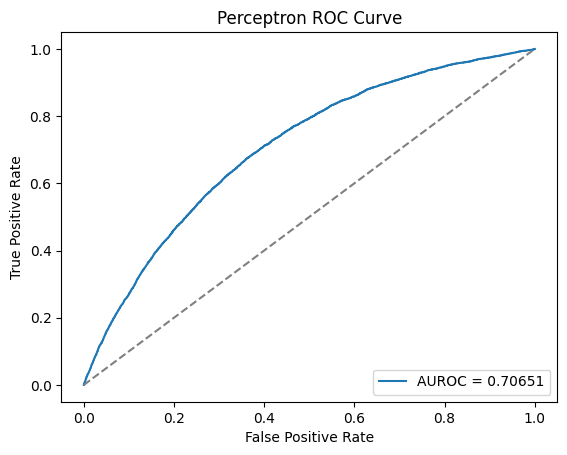

In [14]:
perceptron = Perceptron(tol=1e-3, random_state=3959, shuffle=True)
perceptron.fit(X_train,y_train)
y_prob_1 = perceptron.decision_function(X_test)
auroc_1 = roc_auc_score(y_test, y_prob_1)
fpr_1, tpr_1, _ = roc_curve(y_test, y_prob_1)
plt.plot(fpr_1, tpr_1, label=f'AUROC = {auroc_1:.5f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Perceptron ROC Curve')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.legend(loc='lower right')
plt.show()

# Question 2

In [7]:
hidden_layer_sizes_2 = [(10,),(10,4),(10,4,3),(10,4,3,2)]
activation_2 = ['identity', 'logistic', 'tanh', 'relu']
aurocs_2 = pd.DataFrame()

for i in range(4):
    temp = []
    for j in range(4):
        mlp_2 = MLPClassifier(activation=activation_2[i], random_state=3959, hidden_layer_sizes=hidden_layer_sizes_2[j])
        mlp_2.fit(X_train, y_train)
        y_prob_2 = mlp_2.predict_proba(X_test)[:, 1]
        auroc_2 = roc_auc_score(y_test, y_prob_2)
        temp.append(auroc_2)
    aurocs_2[activation_2[i]] = temp

In [8]:
aurocs_2.head()

,identity,logistic,tanh,relu
0,0.820974,0.829913,0.829231,0.829181
1,0.821191,0.829673,0.829085,0.829061
2,0.821395,0.829409,0.828828,0.828654
3,0.821590,0.830075,0.828738,0.828441


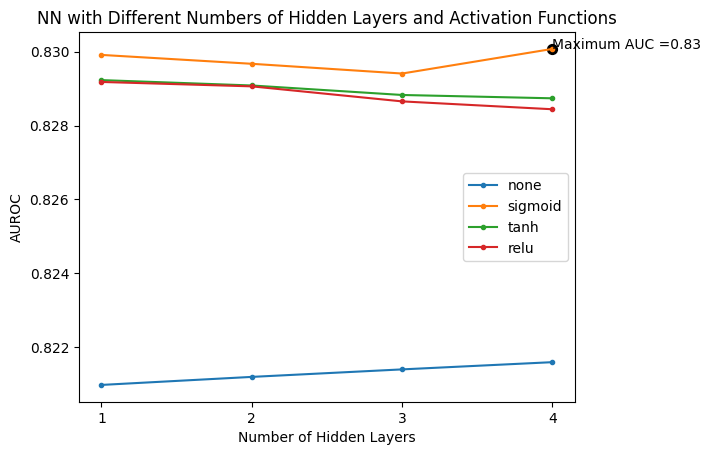

In [9]:
num_layers = [1,2,3,4]
max_index = np.argmax(aurocs_2.values)
max_hidden_layer_size = max_index//4 + 1
max_auroc = aurocs_2.values.flatten()[max_index]
plt.plot(num_layers, np.array(aurocs_2['identity']), label='none', marker='.')
plt.plot(num_layers, np.array(aurocs_2['logistic']), label='sigmoid', marker='.')
plt.plot(num_layers, np.array(aurocs_2['tanh']), label='tanh', marker='.')
plt.plot(num_layers, np.array(aurocs_2['relu']), label='relu', marker='.')
plt.scatter(max_hidden_layer_size, max_auroc, color='black', marker='o', s=50)
plt.text(max_hidden_layer_size, max_auroc, f'Maximum AUC ={max_auroc:.2f}')
plt.xlabel('Number of Hidden Layers')
plt.xticks(num_layers)
plt.ylabel('AUROC')
plt.title('NN with Different Numbers of Hidden Layers and Activation Functions')
plt.legend()
plt.show()

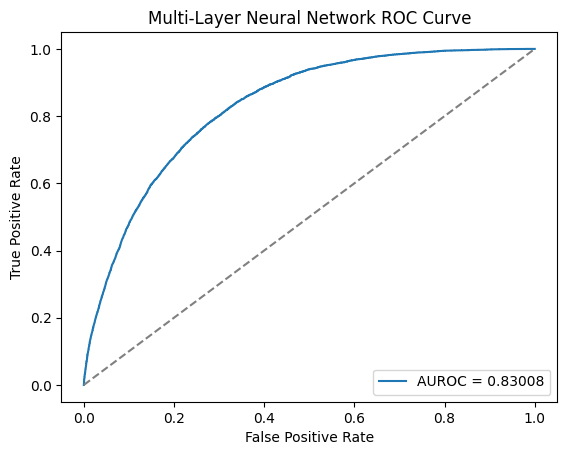

In [33]:
mlp_2 = MLPClassifier(activation='logistic', random_state=3959, hidden_layer_sizes=(10,4,3,2))
mlp_2.fit(X_train, y_train)
y_prob_2 = mlp_2.predict_proba(X_test)[:, 1]
auroc_2 = roc_auc_score(y_test, y_prob_2)
fpr_2, tpr_2, _ = roc_curve(y_test, y_prob_2)
plt.plot(fpr_2, tpr_2, label=f'AUROC = {auroc_2:.5f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Layer Neural Network ROC Curve')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.legend(loc='lower right')
plt.show()

# Question 3

In [10]:
mlp_3 = MLPClassifier(activation='logistic', random_state=3959, hidden_layer_sizes=(10,4,3,2), max_iter=1)

auroc_scores_3 = []

for epoch in range(10):
    mlp_3.partial_fit(X_train, y_train, classes=np.unique(y_train))
    y_prob = mlp_3.predict_proba(X_test)
    auroc = roc_auc_score(y_test, y_prob[:, 1])
    auroc_scores_3.append(auroc)
    
    print(f"Epoch {epoch+1}, AUROC: {auroc}")

Epoch 1, AUROC: 0.8158406895629292
Epoch 2, AUROC: 0.8232298597446991
Epoch 3, AUROC: 0.8249959489866374
Epoch 4, AUROC: 0.8258480880177463
Epoch 5, AUROC: 0.8259395445908426
Epoch 6, AUROC: 0.8261773815704194
Epoch 7, AUROC: 0.8265121176169044
Epoch 8, AUROC: 0.8267997793314967
Epoch 9, AUROC: 0.8270631020841793
Epoch 10, AUROC: 0.8273138390699222


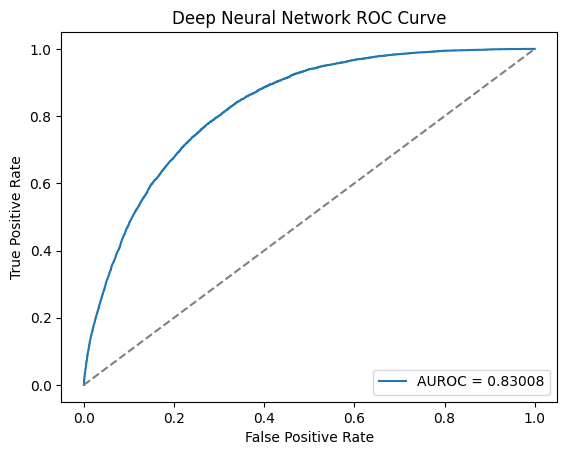

In [17]:
mlp_3 = MLPClassifier(activation='logistic', random_state=3959, hidden_layer_sizes=(10,4,3,2))
mlp_3.fit(X_train, y_train)
y_prob_3 = mlp_3.predict_proba(X_test)[:, 1]
auroc_3 = roc_auc_score(y_test, y_prob_3)
fpr_3, tpr_3, _ = roc_curve(y_test, y_prob_3)
plt.plot(fpr_3, tpr_3, label=f'AUROC = {auroc_3:.5f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Deep Neural Network ROC Curve')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.legend(loc='lower right')
plt.show()

In [24]:
np.random.seed(3959)
tf.random.set_seed(3959)

# Reshape X_train to add a new axis for timesteps
X_train_3 = np.expand_dims(X_train, axis=2)

# Define the input shape
input_shape = X_train_3.shape[1:]  # Shape without the sample dimension

# Define the CNN architecture
def create_cnn(input_shape):
    model = models.Sequential()
    
    # Convolutional layers
    model.add(layers.Conv1D(64, kernel_size=1, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(32, kernel_size=1, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(16, kernel_size=1, activation='relu'))
    
    # Flatten layer to transition from convolutional to fully connected layers
    model.add(layers.Flatten())
    
    # Fully connected layers
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

# Instantiate the CNN model
cnn_model = create_cnn(input_shape)

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['AUC'])

# Train the model
history = cnn_model.fit(X_train_3, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
6342/6342 [==============================] - 13s 2ms/step - loss: 0.3374 - auc: 0.7871 - val_loss: 0.3291 - val_auc: 0.8029
Epoch 2/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.3298 - auc: 0.8005 - val_loss: 0.3288 - val_auc: 0.8058
Epoch 3/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.3282 - auc: 0.8034 - val_loss: 0.3256 - val_auc: 0.8081
Epoch 4/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.3269 - auc: 0.8056 - val_loss: 0.3244 - val_auc: 0.8104
Epoch 5/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.3260 - auc: 0.8070 - val_loss: 0.3257 - val_auc: 0.8094
Epoch 6/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.3252 - auc: 0.8084 - val_loss: 0.3235 - val_auc: 0.8125
Epoch 7/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.3244 - auc: 0.8098 - val_loss: 0.3224 - val_auc: 0.8134
Epoch 8/10
6342/6342 [==============================] -

1586/1586 [==============================] - 1s 573us/step


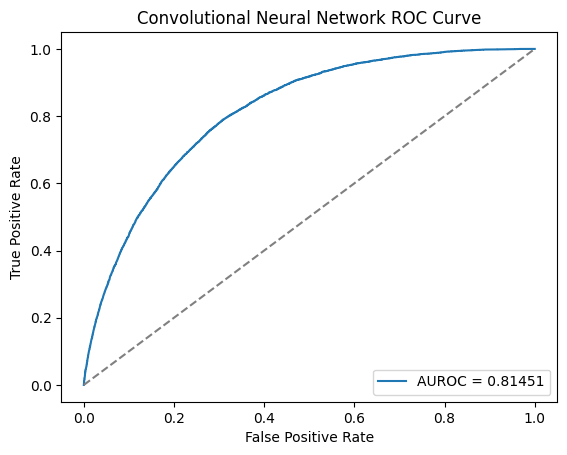

In [25]:
cnn_auroc = roc_auc_score(y_test, cnn_model.predict(X_test))
cnn_y_prob = cnn_model.predict(X_test)
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, cnn_y_prob)
plt.plot(fpr_cnn, tpr_cnn, label=f'AUROC = {cnn_auroc:.5f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Convolutional Neural Network ROC Curve')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.legend(loc='lower right')
plt.show()

# Question 4

In [26]:
# Set the outcome variable
y_45 = df_original.iloc[:,3]
df_45 = df_original.drop(columns=['BMI'])
# Map 'BiologicalSex' to 'IsMale'
df_45['IsMale'] = df_45['BiologicalSex'].map({1: 1, 2: 0})
df_45 = df_45.drop(columns=['BiologicalSex'])
# Standardize all columns
df_45 = df_45.apply(stats.zscore)
X_45 = df_45

In [27]:
# Split the data into training and test sets
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_45,y_45, test_size = 0.2, random_state = 3959)

In [28]:
activation_4 = activation_2
rmses_4 = []
for activation in activation_4:
    mlp_4 = MLPClassifier(activation=activation, random_state=3959, hidden_layer_sizes=(10,))
    mlp_4.fit(X_train_4, y_train_4)
    y_pred_4 = mlp_4.predict(X_test_4)
    rmses_4.append(np.sqrt(mean_squared_error(y_test_4, y_pred_4)))

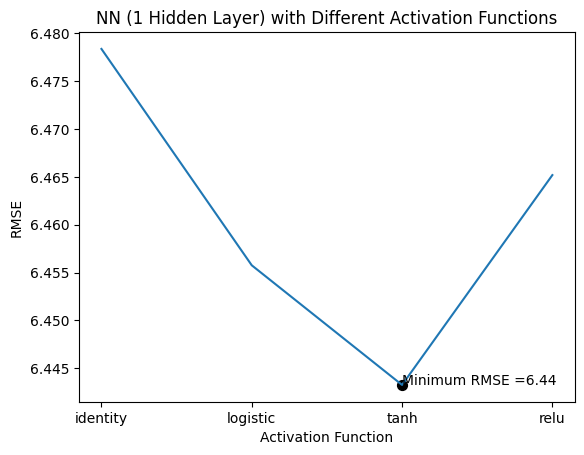

In [29]:
min_index = np.argmin(rmses_4)
min_activation = activation_4[min_index] 
min_rmse = rmses_4[min_index]
plt.plot(activation_4, rmses_4)
plt.scatter(min_activation, min_rmse, color='black', marker='o', s=50)
plt.text(min_activation, min_rmse, f'Minimum RMSE ={min_rmse:.2f}')
plt.xlabel('Activation Function')
plt.ylabel('RMSE')
plt.title('NN (1 Hidden Layer) with Different Activation Functions')
plt.show()

# Question 5

In [30]:
hidden_layer_sizes_5 = hidden_layer_sizes_2
activation_5 = activation_2
rmses_5 = pd.DataFrame()

# Split the data into training and test sets
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_45,y_45, test_size = 0.2, random_state = 3959)

for i in range(4):
    temp = []
    for j in range(4):
        mlp_5 = MLPClassifier(activation=activation_5[i], random_state=3959, hidden_layer_sizes=hidden_layer_sizes_5[j])
        mlp_5.fit(X_train_5, y_train_5)
        y_pred_5 = mlp_5.predict(X_test_5)
        rmse_5 = np.sqrt(mean_squared_error(y_test_5, y_pred_5))
        temp.append(rmse_5)
    rmses_5[activation_5[i]] = temp

In [31]:
rmses_5.head()

,identity,logistic,tanh,relu
0,6.478365,6.455760,6.443262,6.465184
1,6.555704,6.472806,6.449312,6.449850
2,6.475451,6.421725,6.398230,6.436157
3,6.451041,6.498408,6.401714,6.447198


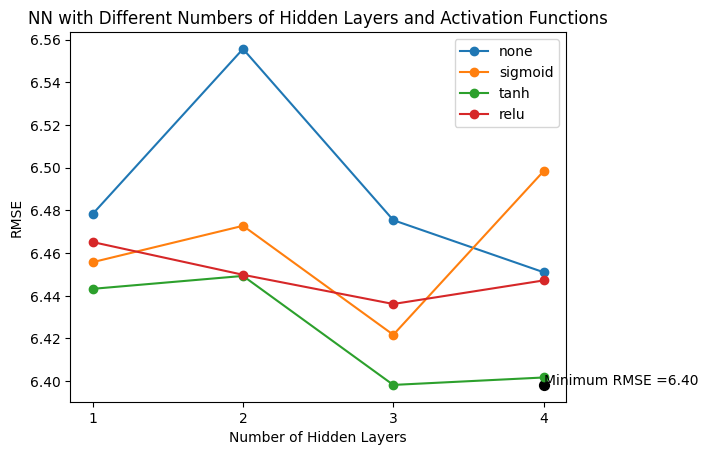

In [32]:
min_index = np.argmin(rmses_5.values)
min_hidden_layer_size = max_index//4 + 1
min_rmse = rmses_5.values.flatten()[min_index]
plt.plot(num_layers, np.array(rmses_5['identity']), label='none', marker='o')
plt.plot(num_layers, np.array(rmses_5['logistic']), label='sigmoid', marker='o')
plt.plot(num_layers, np.array(rmses_5['tanh']), label='tanh', marker='o')
plt.plot(num_layers, np.array(rmses_5['relu']), label='relu', marker='o')
plt.scatter(min_hidden_layer_size, min_rmse, color='black', marker='o', s=50)
plt.text(min_hidden_layer_size, min_rmse, f'Minimum RMSE ={min_rmse:.2f}')
plt.xlabel('Number of Hidden Layers')
plt.xticks(num_layers)
plt.ylabel('RMSE')
plt.title('NN with Different Numbers of Hidden Layers and Activation Functions')
plt.legend()
plt.show()

In [21]:
random_states = [3,39,395,3959]
test_sizes = [0.1,0.2,0.3,0.4]
rmses_5 = pd.DataFrame()

for size in test_sizes:
    temp = []
    for rand in random_states:
        X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_45, y_45, test_size = size, random_state = rand)
        mlp_5 = MLPClassifier(activation='tanh', random_state=rand, hidden_layer_sizes=(10,4,3))
        mlp_5.fit(X_train_5, y_train_5)
        y_pred_5 = mlp_5.predict(X_test_5)
        rmse_5 = np.sqrt(mean_squared_error(y_test_5, y_pred_5))
        temp.append(rmse_5)
    rmses_5[size] = temp

In [22]:
rmses_5.head()

,0.1,0.2,0.3,0.4
0,6.499412,6.509442,6.496921,6.520587
1,6.538041,6.511190,6.480956,6.501617
2,6.495914,6.473288,6.468536,6.516152
3,6.449902,6.398230,6.478460,6.427433


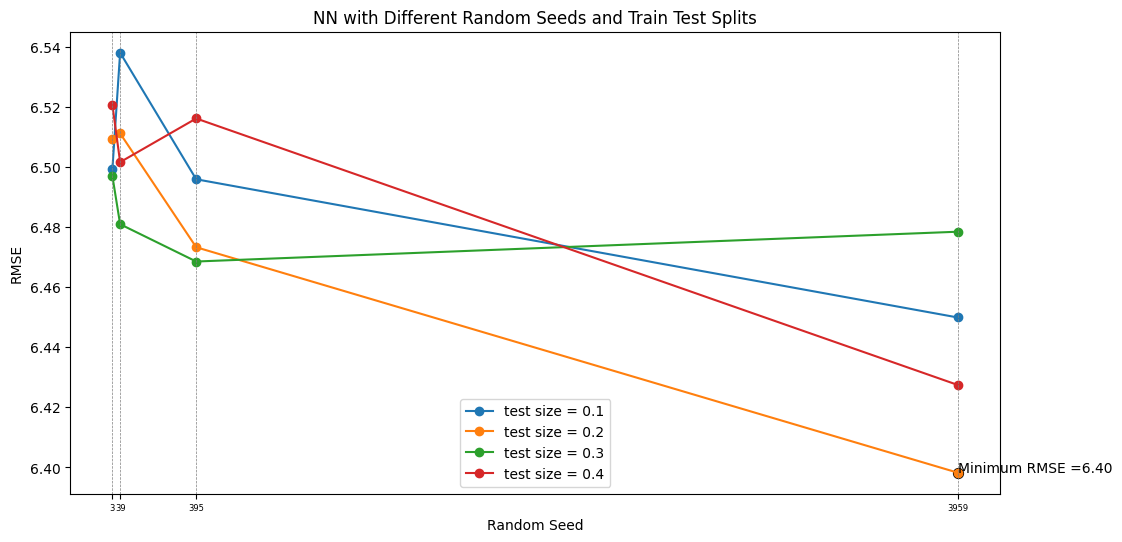

In [23]:
min_index = np.argmin(rmses_5.values)
min_seed = random_states[max_index//4]
min_rmse = rmses_5.values.flatten()[min_index]
plt.figure(figsize=(12,6))
plt.plot(random_states, np.array(rmses_5[0.1]), label='test size = 0.1', marker='o')
plt.plot(random_states, np.array(rmses_5[0.2]), label='test size = 0.2', marker='o')
plt.plot(random_states, np.array(rmses_5[0.3]), label='test size = 0.3', marker='o')
plt.plot(random_states, np.array(rmses_5[0.4]), label='test size = 0.4', marker='o')
for x in random_states:
    plt.axvline(x=x, linestyle='--', color='gray', lw=0.5)
plt.scatter(min_seed, min_rmse, color='black', marker='o', s=50)
plt.text(min_seed, min_rmse, f'Minimum RMSE ={min_rmse:.2f}')
plt.xlabel('Random Seed')
plt.xticks(random_states, size=6)
plt.ylabel('RMSE')
plt.title('NN with Different Random Seeds and Train Test Splits')
plt.legend()
plt.show()

# Extra credit a

In [24]:
perceptron = Perceptron(tol=1e-3, random_state=3959, shuffle=True)
perceptron.fit(X_train, y_train)
y_pred_1 = perceptron.predict(X_test)

acc_diffs_1 = []
auroc_diffs_1 = []
rmse_diffs_1 = []

for column in X:
    X_train_a = X_train.drop(columns=column)
    X_test_a = X_test.drop(columns=column)
    
    perceptron.fit(X_train_a, y_train)
    y_pred_a = perceptron.predict(X_test_a) 
    y_prob_a = perceptron.decision_function(X_test_a)

    acc_a = accuracy_score(y_test, y_pred_a)
    auroc_a = roc_auc_score(y_test, y_prob_a)
    rmse_a = np.sqrt(mean_squared_error(y_test, y_pred_a))

    acc_diff = accuracy_score(y_test, y_pred_1) - acc_a
    auroc_diff = auroc_1 - auroc_a
    rmse_diff = rmse_a - np.sqrt(mean_squared_error(y_test, y_pred_1))

    acc_diffs_1.append(acc_diff)
    auroc_diffs_1.append(auroc_diff)
    rmse_diffs_1.append(rmse_diff)

In [25]:
df_diff_1 = pd.DataFrame({'Accuracy': acc_diffs_1, 'AUROC': auroc_diffs_1, 'RMSE': rmse_diffs_1}, index=X.columns)
df_diff_1.head()

,Accuracy,AUROC,RMSE
HighBP,-0.006031,0.017389,-0.007378
HighChol,0.059031,0.077094,0.066249
BMI,0.012122,-0.062154,0.014443
Smoker,-0.009145,0.009738,-0.011241
Stroke,0.038336,0.044685,0.044119


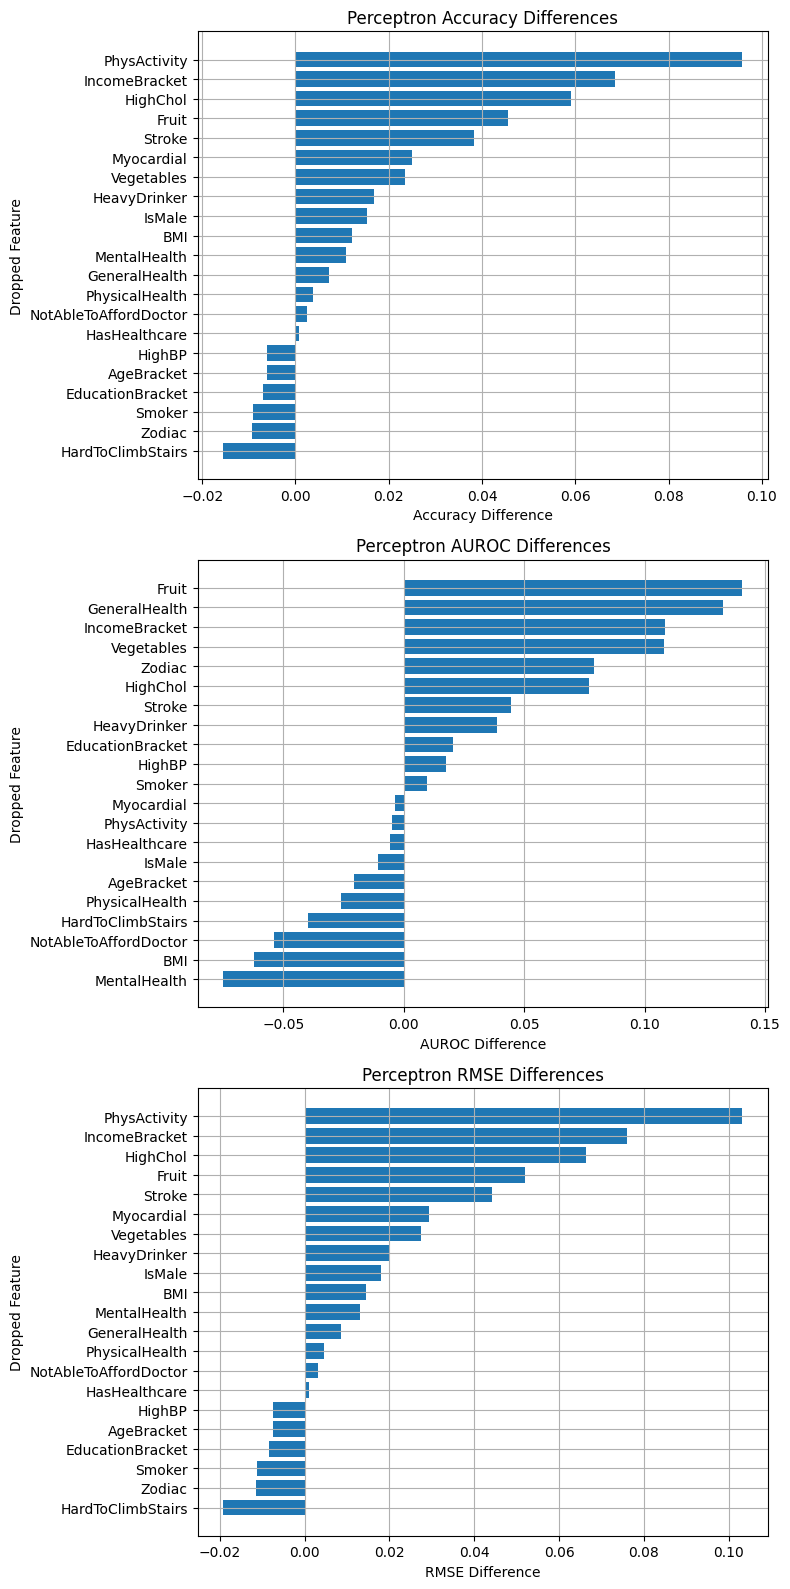

In [26]:
fix, axes = plt.subplots(3, 1, figsize=(8, 16))
sorted_acc_diffs_1 = df_diff_1['Accuracy'].sort_values()
sorted_auroc_diffs_1 = df_diff_1['AUROC'].sort_values()
sorted_rmse_diffs_1 = df_diff_1['RMSE'].sort_values()

axes[0].barh(sorted_acc_diffs_1.index, sorted_acc_diffs_1)
axes[0].set_xlabel('Accuracy Difference')
axes[0].set_ylabel('Dropped Feature')
axes[0].set_title('Perceptron Accuracy Differences')
axes[0].grid(True)

axes[1].barh(sorted_auroc_diffs_1.index, sorted_auroc_diffs_1)
axes[1].set_xlabel('AUROC Difference')
axes[1].set_ylabel('Dropped Feature')
axes[1].set_title('Perceptron AUROC Differences')
axes[1].grid(True)

axes[2].barh(sorted_rmse_diffs_1.index, sorted_rmse_diffs_1)
axes[2].set_xlabel('RMSE Difference')
axes[2].set_ylabel('Dropped Feature')
axes[2].set_title('Perceptron RMSE Differences')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [27]:
dnn = MLPClassifier(activation='logistic', random_state=3959, hidden_layer_sizes=(10,4,3,2))
dnn.fit(X_train, y_train)
y_pred_3 = dnn.predict(X_test)

acc_diffs_23 = []
auroc_diffs_23 = []
rmse_diffs_23 = []

for column in X:
    X_train_a = X_train.drop(columns=column)
    X_test_a = X_test.drop(columns=column)
    
    dnn.fit(X_train_a, y_train)
    y_pred_a = dnn.predict(X_test_a) 
    y_prob_a = dnn.predict_proba(X_test_a)[:, 1]

    acc_a = accuracy_score(y_test, y_pred_a)
    auroc_a = roc_auc_score(y_test, y_prob_a)
    rmse_a = np.sqrt(mean_squared_error(y_test, y_pred_a))
    
    acc_diff = accuracy_score(y_test, y_pred_3) - acc_a
    auroc_diff = auroc_3 - auroc_a
    rmse_diff = rmse_a - np.sqrt(mean_squared_error(y_test, y_pred_3))

    acc_diffs_23.append(acc_diff)
    auroc_diffs_23.append(auroc_diff)
    rmse_diffs_23.append(rmse_diff)

In [28]:
df_diff_23 = pd.DataFrame({'Accuracy': acc_diffs_23, 'AUROC': auroc_diffs_23, 'RMSE': rmse_diffs_23}, index=X.columns)
df_diff_23.head()

,Accuracy,AUROC,RMSE
HighBP,0.000039,0.006959,0.000054
HighChol,0.001498,0.005824,0.002048
BMI,0.004632,0.016071,0.006295
Smoker,0.000650,0.000702,0.000890
Stroke,0.000769,0.001041,0.001052


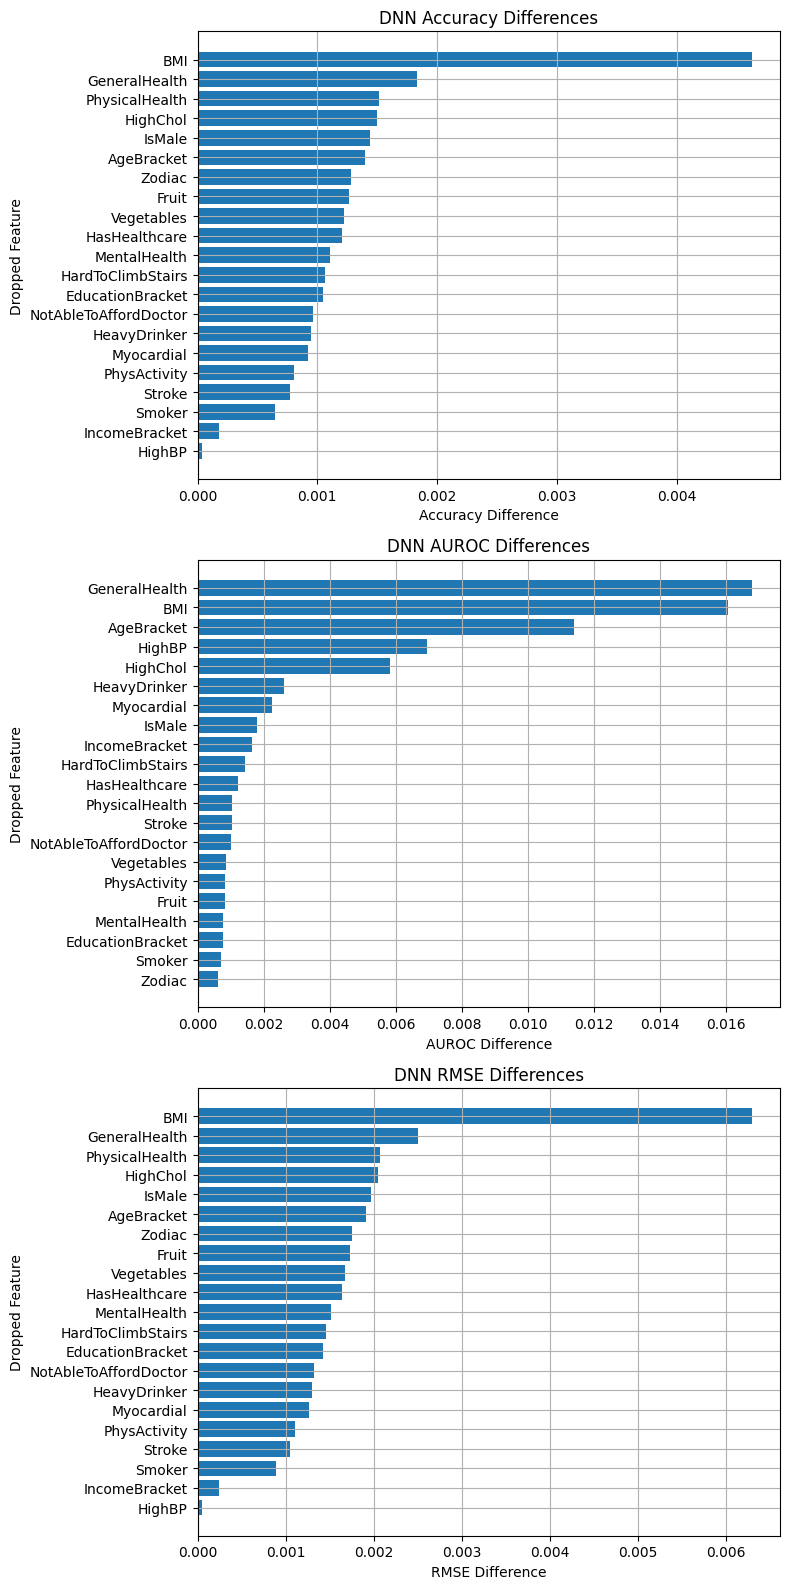

In [29]:
fix, axes = plt.subplots(3, 1, figsize=(8, 16))
sorted_acc_diffs_23 = df_diff_23['Accuracy'].sort_values()
sorted_auroc_diffs_23 = df_diff_23['AUROC'].sort_values()
sorted_rmse_diffs_23 = df_diff_23['RMSE'].sort_values()

axes[0].barh(sorted_acc_diffs_23.index, sorted_acc_diffs_23)
axes[0].set_xlabel('Accuracy Difference')
axes[0].set_ylabel('Dropped Feature')
axes[0].set_title('DNN Accuracy Differences')
axes[0].grid(True)

axes[1].barh(sorted_auroc_diffs_23.index, sorted_auroc_diffs_23)
axes[1].set_xlabel('AUROC Difference')
axes[1].set_ylabel('Dropped Feature')
axes[1].set_title('DNN AUROC Differences')
axes[1].grid(True)

axes[2].barh(sorted_rmse_diffs_23.index, sorted_rmse_diffs_23)
axes[2].set_xlabel('RMSE Difference')
axes[2].set_ylabel('Dropped Feature')
axes[2].set_title('DNN RMSE Differences')
axes[2].grid(True)

plt.tight_layout()
plt.show()